In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [2]:
#import data
raw_df = pd.read_csv('../raw_data/data/listings.csv')

In [3]:
#view head of data with all columns showing
#list number of columns and rows
raw_df = pd.read_csv('../raw_data/data/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
print(f"The dataset contains {len(raw_df.columns)} columns")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 44464 Airbnb listings
The dataset contains 75 columns


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,2023-06-07,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,https://www.airbnb.com/users/show/647546,Marco,2011-05-31,"North Hollywood, CA","Hey, I'm Marco!\r\n\r\nWelcome, your comfort a...",within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/20706...,https://a0.muscache.com/im/pictures/user/20706...,Valley Glen,4.0,9.0,"['email', 'phone']",t,t,"North Hollywood, California, United States",Valley Glen,City of Los Angeles,34.18163,-118.39925,Private room in bed and breakfast,Private room,3,NaN,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",$80.00,31,120,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,0,0,0,122,2023-06-07,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,NaN,f,4,1,3,0,1.67
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,https://www.airbnb.com/users/show/175264,Michael,2010-07-20,"Los Angeles, CA",I am a British DJ and photographer working in ...,within a day,100%,17%,NaN,https://a0.muscache.com/im/users/175264/profil...,https://a0.muscache.com/im/users/175264/profil...,South Robertson,1.0,3.0,"['email', 'phone']",t,f,NaN,Mid-City,City of Los Angeles,34.03926,-118.38017,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",$59.00,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,30,60,90,365,2023-06-07,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,NaN,f,1,0,1,0,0.08
2,109,https://www.airbnb.com/rooms/109,20230606052736,2023-06-07,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, CA","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",within a few hours,100%,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,3.0,"['email', 'phone']",t,t,NaN,Culver City,Other Cities,33.98301,-118.38607,Entire condo,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",$129.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,3,3,3,3,2023-06-07,2,0,0,2011-08-15,2016-05-15,4

In [4]:
#dropping unnecessary/free text columns
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']

In [5]:
df = raw_df.drop(cols_to_drop, axis=1)
print(f"The dataset contains {len(df.columns)} columns")

The dataset contains 57 columns


In [6]:
#check which columns have a lot of null values
df.isna().sum().sort_values(ascending=False).head(10)

bathrooms                    44464
calendar_updated             44464
license                      34877
neighbourhood                18241
bedrooms                     14752
review_scores_value          12942
review_scores_location       12940
review_scores_checkin        12938
review_scores_cleanliness    12934
review_scores_accuracy       12933
dtype: int64

In [7]:
#drop columns with a lot of null values
df.drop(['bathrooms', 'calendar_updated', 'license', 'neighbourhood'], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

In [8]:
#drop repetitive columns / columns with only host information
df.drop(['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [9]:
#drop location based columns since we are only looking in LA and our target location feature is neighbourhood_cleansed
df.drop(['neighbourhood_group_cleansed', 'latitude', 'longitude'], axis=1, inplace=True)

In [10]:
#drop more repetitive columns 
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)
print(f"The dataset contains {len(df.columns)} columns")

The dataset contains 38 columns


In [11]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,2011-05-31,within an hour,100%,100%,NaN,t,t,Valley Glen,Private room in bed and breakfast,Private room,3,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",$80.00,31,120,t,0,0,0,122,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,f,4,1.67
40667,2010-07-20,within a day,100%,17%,NaN,t,f,Mid-City,Private room in rental unit,Private room,2,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",$59.00,30,180,t,30,60,90,365,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,f,1,0.08
109,2008-06-27,within a few hours,100%,0%,f,t,t,Culver City,Entire condo,Entire home/apt,6,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",$129.00,30,730,t,3,3,3,3,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,f,1,0.01


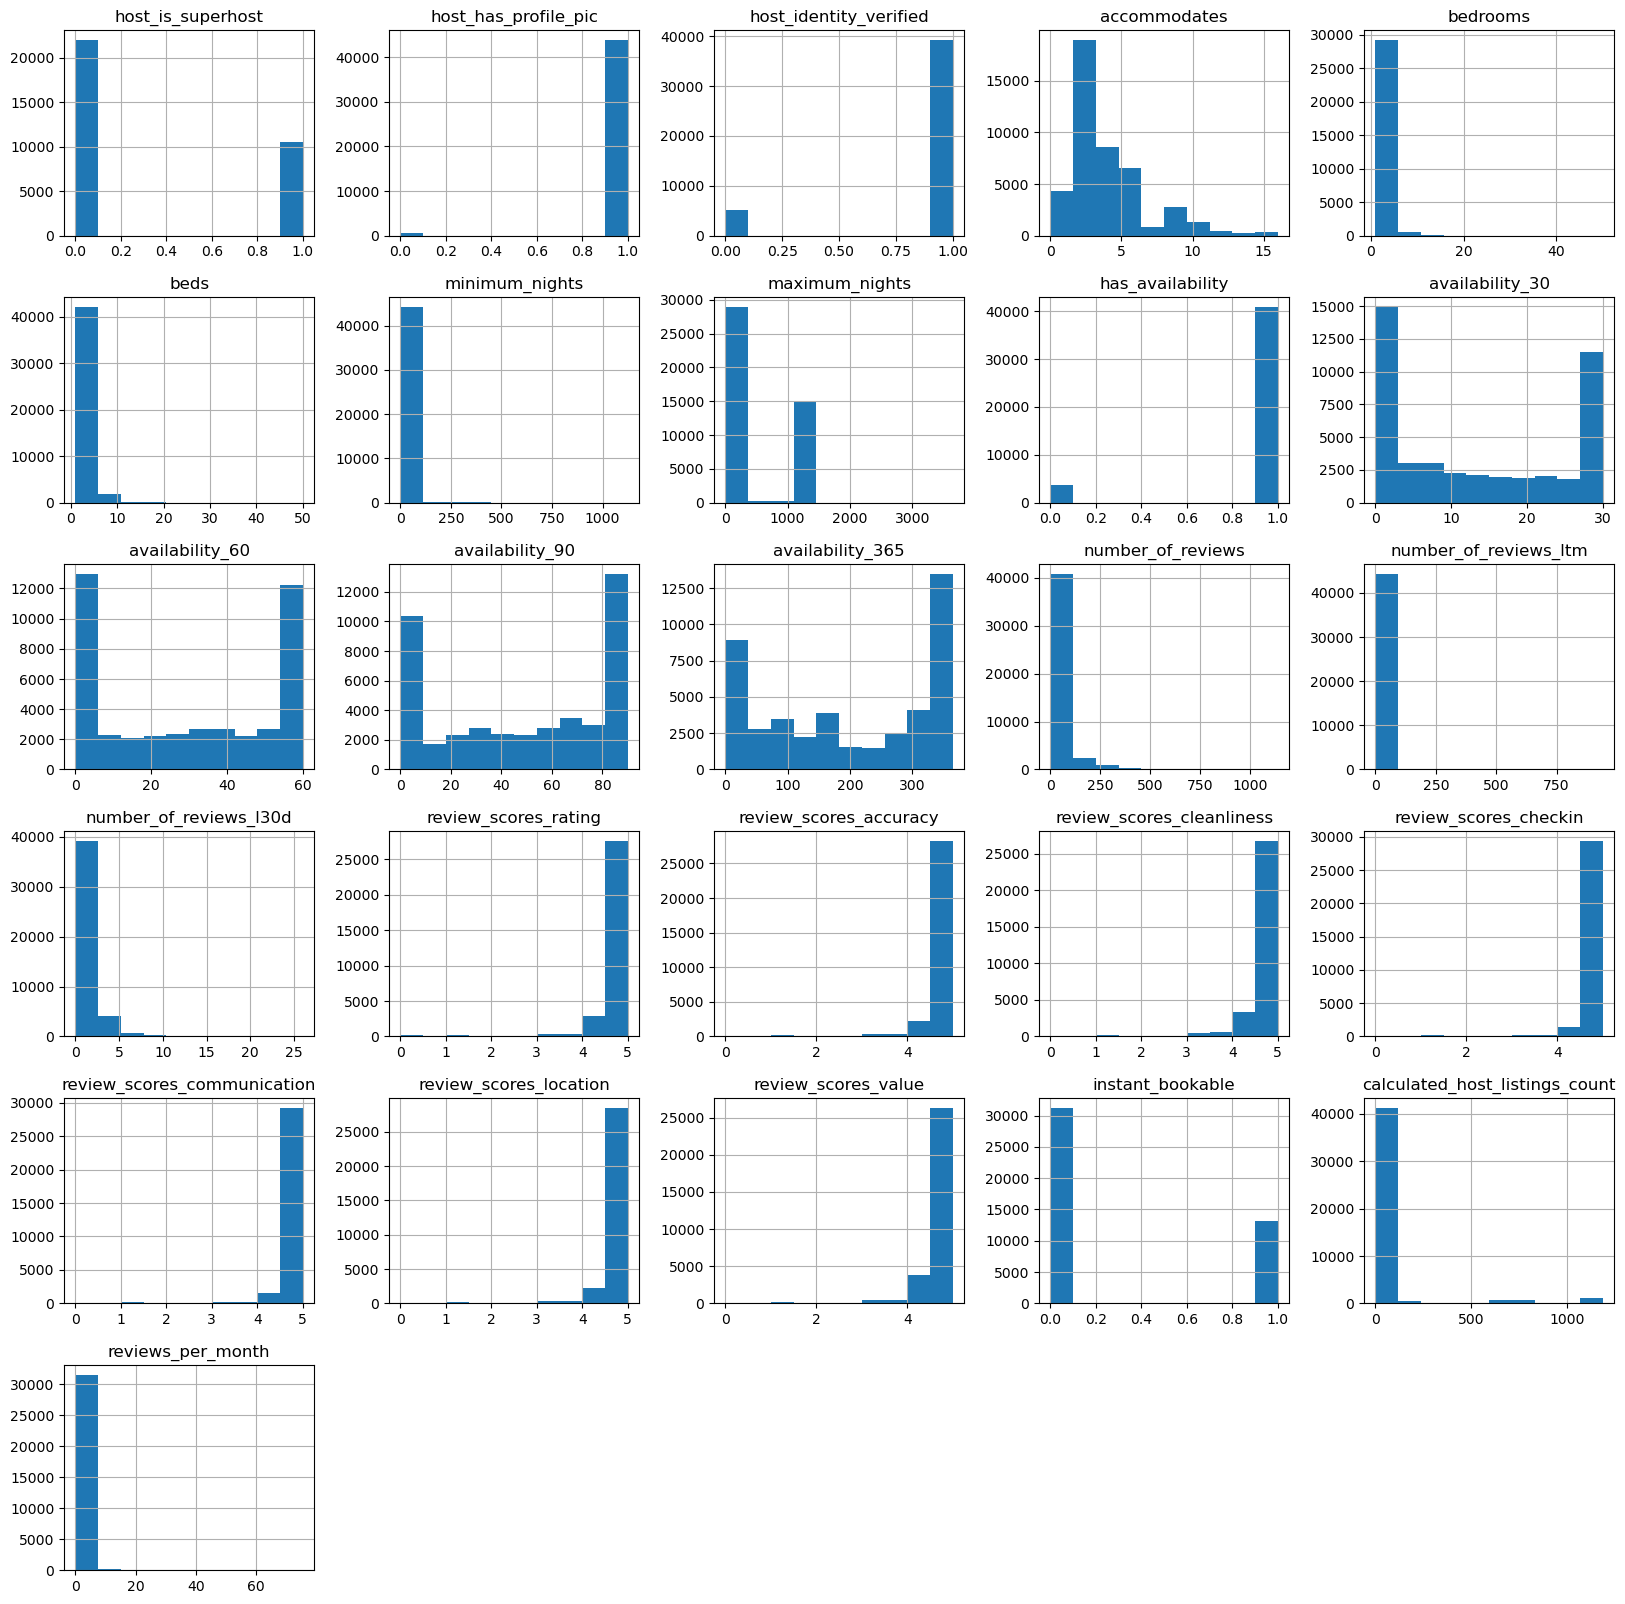

In [12]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [13]:
#print column names
for col in df.columns:
    print(col)  
    
#clean up individual columns

host_since
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_has_profile_pic
host_identity_verified
neighbourhood_cleansed
property_type
room_type
accommodates
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
has_availability
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
instant_bookable
calculated_host_listings_count
reviews_per_month


In [14]:
#fixing date datatypes 
df[['first_review', 'last_review', 'host_since']] = df[['first_review', 'last_review', 'host_since']].apply(pd.to_datetime)

In [15]:
#change price column from object to float and remove special characters
char_remove = {'$':'', ',':''}
for key, value in char_remove.items():
    df['price'] = df['price'].str.replace(key, value, regex=True)
    
df['price'] = df['price'].astype('float')

In [16]:
#host since

df['host_days_active'] = (datetime(2023, 4, 6) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 2154.0
Median days as host: 2279.0


In [17]:
#dropping host since, because now we have host days active feature
df.drop(['host_since'], axis=1, inplace=True)

In [18]:
#host response time
df.host_response_time.isna().sum()

9975

In [19]:
df.host_response_time.fillna("unknown", inplace=True)
df['host_response_time'].value_counts()

within an hour        25894
unknown                9975
within a few hours     5697
within a day           2233
a few days or more      665
Name: host_response_time, dtype: int64

In [20]:
#host response rate
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

In [21]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       26870
unknown     9975
90-99%      3854
50-89%      2858
0-49%        907
Name: host_response_rate, dtype: int64

In [22]:
#host acceptance rate
df.host_acceptance_rate = df.host_acceptance_rate.str[:-1].astype('float64')

In [23]:
# Bin into four categories
df.host_acceptance_rate = pd.cut(df.host_acceptance_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_acceptance_rate = df.host_acceptance_rate.astype('str')

# Replace nulls with 'unknown'
df.host_acceptance_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_acceptance_rate.value_counts()

100%       14720
90-99%     11335
unknown     9423
50-89%      6751
0-49%       2235
Name: host_acceptance_rate, dtype: int64

In [24]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_days_active
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,within an hour,100%,100%,NaN,1.0,1.0,Valley Glen,Private room in bed and breakfast,Private room,3,1 private bath,NaN,2.0,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",80.0,31,120,1,0,0,0,122,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,0,4,1.67,4328.0
40667,within a day,100%,0-49%,NaN,1.0,0.0,Mid-City,Private room in rental unit,Private room,2,1.5 shared baths,NaN,2.0,"[""Smoke alarm"", ""Hot water"", ""Free street park...",59.0,30,180,1,30,60,90,365,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,0,1,0.08,4643.0
109,within a few hours,100%,0-49%,0.0,1.0,1.0,Culver City,Entire condo,Entire home/apt,6,2 baths,2.0,2.0,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",129.0,30,730,1,3,3,3,3,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0,1,0.01,5396.0


In [25]:
#host is superhost 
df['host_is_superhost'].isna().sum()

11881

In [26]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(0)

In [27]:
#host has profile pic
df['host_has_profile_pic'].isna().sum()

2

In [28]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)

In [29]:
#host identity verified 
df['host_identity_verified'].isna().sum()

2

In [30]:
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)

In [43]:
#neighbourhood cleansed
#no null values in one of our important features
df['neighbourhood_cleansed'].isna().sum()

0

In [68]:
#property type
df['property_type'].value_counts().head(100)

Entire rental unit                    10985
Entire home                           10318
Private room in home                   7388
Entire guesthouse                      2428
Private room in rental unit            2231
Entire condo                           1889
Entire guest suite                     1309
Entire villa                            792
Entire townhouse                        772
Entire bungalow                         615
Private room in condo                   589
Entire serviced apartment               576
Private room in townhouse               452
Entire loft                             434
Private room in villa                   349
Shared room in home                     321
Room in hotel                           311
Room in boutique hotel                  281
Private room in guest suite             260
Shared room in rental unit              217
Private room in bungalow                189
Entire cottage                          175
Camper/RV                       

Number of room types : 4

Entire home/apt    31023
Private room       12623
Shared room          740
Hotel room            78
Name: room_type, dtype: int64


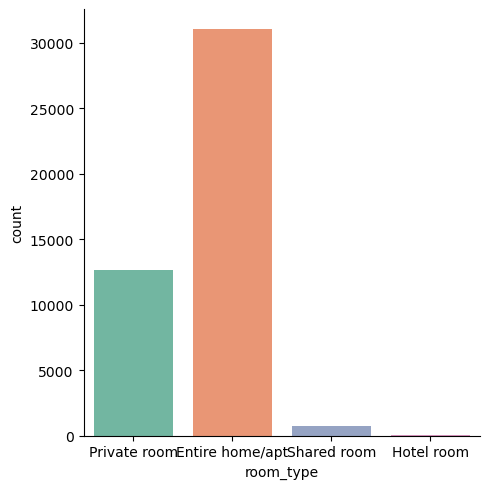

In [37]:
# Number of room types
print("Number of room types :", len(df["room_type"].unique()))
print()

# Number of listings of each room type
print(df["room_type"].value_counts())
sns.catplot(x = "room_type", data = df, kind = "count", palette="Set2")

In [79]:
# Checking out the mean prices for the different room and property types
property_room = df.groupby(['property_type','room_type']).price.mean()
property_room = property_room.reset_index()
property_room = property_room.sort_values('price',ascending=[0])
property_room.head()

,property_type,room_type,price
64,Private room in treehouse,Private room,2087.200000
19,Entire home/apt,Entire home/apt,1843.111111
27,Entire villa,Entire home/apt,1843.008838
5,Casa particular,Entire home/apt,1120.250000
74,Room in boutique hotel,Hotel room,1040.500000


In [70]:
df['accommodates'].isna().sum()

0

In [71]:
#bathrooms text
df['bathrooms_text'].isna().sum()

29

In [72]:
df['bathrooms_text'].unique()

array(['1 private bath', '1.5 shared baths', '2 baths', '1 bath',
       '11 shared baths', '1 shared bath', '2.5 baths', '3 baths', nan,
       '1.5 baths', '2 shared baths', '8 shared baths', '8 baths',
       '8.5 shared baths', '3.5 baths', '4 baths', '0 baths', '4.5 baths',
       '2.5 shared baths', '3.5 shared baths', 'Half-bath', '5 baths',
       '3 shared baths', '11.5 shared baths', '4.5 shared baths',
       '7.5 baths', '5.5 baths', '0 shared baths', 'Shared half-bath',
       '8.5 baths', '6.5 baths', '5 shared baths', '6 baths', '9 baths',
       '7 baths', '4 shared baths', '12.5 baths', '10 baths', '9.5 baths',
       '12 baths', 'Private half-bath', '11.5 baths', '13 baths',
       '11 baths', '5.5 shared baths', '13.5 baths', '10.5 baths',
       '21 baths', '20 baths', '15 baths', '10 shared baths',
       '6 shared baths', '16 baths', '17 baths', '27 baths', '42 baths',
       '7 shared baths', '46 baths'], dtype=object)

In [73]:
df['bathrooms_text'] = df['bathrooms_text'].str.extract(pat='(\d+)', expand=False)

In [74]:
df['bathrooms_text'].unique()

array(['1', '2', '11', '3', nan, '8', '4', '0', '5', '7', '6', '9', '12',
       '10', '13', '21', '20', '15', '16', '17', '27', '42', '46'],
      dtype=object)

In [75]:
for col in ['bathrooms_text']:
    df[col].fillna(df[col].median(), inplace=True)

In [76]:
df['bathrooms_text'] = df['bathrooms_text'].astype('int')

In [77]:
df['bathrooms_text'].isna().sum()

0

In [78]:
df['bedrooms'].isna().sum()

14752

In [80]:
for col in ['bedrooms']:
    df[col].fillna(df[col].median(), inplace=True)

In [81]:
df['beds'].isna().sum()

552

In [82]:
for col in ['beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [83]:
# Example of amenities listed
df.amenities[:1].values

array(['["Private pool", "Smoke alarm", "Garden view", "Central air conditioning", "Hot water", "Free street parking", "Shower gel", "Refrigerator", "Hair dryer", "First aid kit", "BBQ grill", "Kitchen", "Smoking allowed", "Dishes and silverware", "Single level home", "Outdoor furniture", "Hangers", "Heating", "Keypad", "Private hot tub", "Carbon monoxide alarm", "Outdoor dining area", "Bathtub", "Private entrance", "Extra pillows and blankets", "Cooking basics", "Iron", "Long term stays allowed", "Microwave", "Private backyard \\u2013 Fully fenced", "Dedicated workspace", "Bed linens", "Essentials", "50\\" HDTV with standard cable", "Self check-in", "Coffee maker", "Shared patio or balcony", "Luggage dropoff allowed", "Shampoo", "Lock on bedroom door", "Wifi"]'],
      dtype=object)

In [84]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Ginger Lily shampoo',
 'Free parking on premises \\u2013 1 space] [Kitchen',
 '70\\ HDTV with HBO Max] [Smoke alarm',
 'Fast wifi \\u2013 438 Mbps',
 'Dr. Bronner\\u2019s body soap',
 'Wifi] [75\\ HDTV with Amazon Prime Video',
 'pour-over coffee',
 'Stainless steel stove] [Fire extinguisher',
 'Theorie sage shampoo',
 'Countertop stove',
 'Fast wifi \\u2013 557 Mbps',
 'Samsung Bluetooth sound system',
 'Whirlpool 4 door refrigerator',
 'Laundromat nearby] [Lockbox',
 'High end brands conditioner',
 'conditioner. Trying to not buy plastic bottles. body soap',
 'Private pool - ] [Smoke alarm',
 'Unbrand body soap] [Smoke alarm',
 'Viking oven',
 'Copper Chef Cooktop induction stove',
 'Insigna refrigerator',
 'Alexa sound system',
 'Netflix',
 'Fast wifi \\u2013 147 Mbps] [Lockbox',
 '48\\ TV with Netflix',
 'Stainless GE refrigerator',
 'Denon  sound system with aux',
 'Fridgaire stainless steel oven',
 "O'Keefe and Merritt oven",
 'Avalon Organics or Alba Botanica body soap',
 'Spa

In [85]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_28408\3290083480.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [86]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [87]:
# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['breakfast', 'child_friendly', 'host_greeting', 'secure', 'smoking_allowed', 'accessible', 'event_suitable']


In [88]:
df[['air_conditioning', 'high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym', 'parking', 'outdoor_space', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in']] = df[['air_conditioning', 'high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym', 'parking', 'outdoor_space', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in']].fillna(0)

In [89]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_days_active,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,self_check_in
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,within an hour,100%,100%,0.0,1.0,1.0,Valley Glen,Private room in bed and breakfast,Private room,3,1,2.0,2.0,80.0,31,120,1,0,0,0,122,216,0,0,2012-11-02,2020-11-29,4.96,4.95,4.96,4.99,4.99,4.90,4.95,0,4,1.67,4328.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
40667,within a day,100%,0-49%,0.0,1.0,0.0,Mid-City,Private room in rental unit,Private room,2,1,2.0,2.0,59.0,30,180,1,30,60,90,365,12,0,0,2011-07-20,2018-08-24,4.30,3.82,3.73,4.82,4.64,4.36,4.45,0,1,0.08,4643.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
109,within a few hours,100%,0-49%,0.0,1.0,1.0,Culver City,Entire condo,Entire home/apt,6,2,2.0,2.0,129.0,30,730,1,3,3,3,3,2,0,0,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0,1,0.01,5396.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [90]:
df['first_review'].max()

Timestamp('2023-06-06 00:00:00')

In [91]:
#first review 
df['days_since_firstreview'] = (datetime(2023, 4, 6) - df.first_review).astype('timedelta64[D]')

# Printing mean and median
print("Mean days since first review:", round(df['days_since_firstreview'].mean(),0))
print("Median days since first review:", df['days_since_firstreview'].median())

df.days_since_firstreview.fillna(df.days_since_firstreview.median(), inplace=True)

Mean days since first review: 1069.0
Median days since first review: 718.0


In [92]:
#last review 
df['days_since_lastreview'] = (datetime(2023, 4, 6) - df.last_review).astype('timedelta64[D]')

# Printing mean and median
print("Mean days since last review:", round(df['days_since_lastreview'].mean(),0))
print("Median days since last review:", df['days_since_lastreview'].median())

df.days_since_lastreview.fillna(df.days_since_lastreview.median(), inplace=True)

Mean days since last review: 303.0
Median days since last review: 1.0


In [93]:
df[['days_since_firstreview', 'days_since_lastreview']].head()

,days_since_firstreview,days_since_lastreview
id,,
150097,3807.0,858.0
40667,4278.0,1686.0
109,4252.0,2517.0
152514,3604.0,3604.0
43318,4579.0,-42.0


In [94]:
df.drop(['first_review', 'last_review'], axis=1, inplace=True)

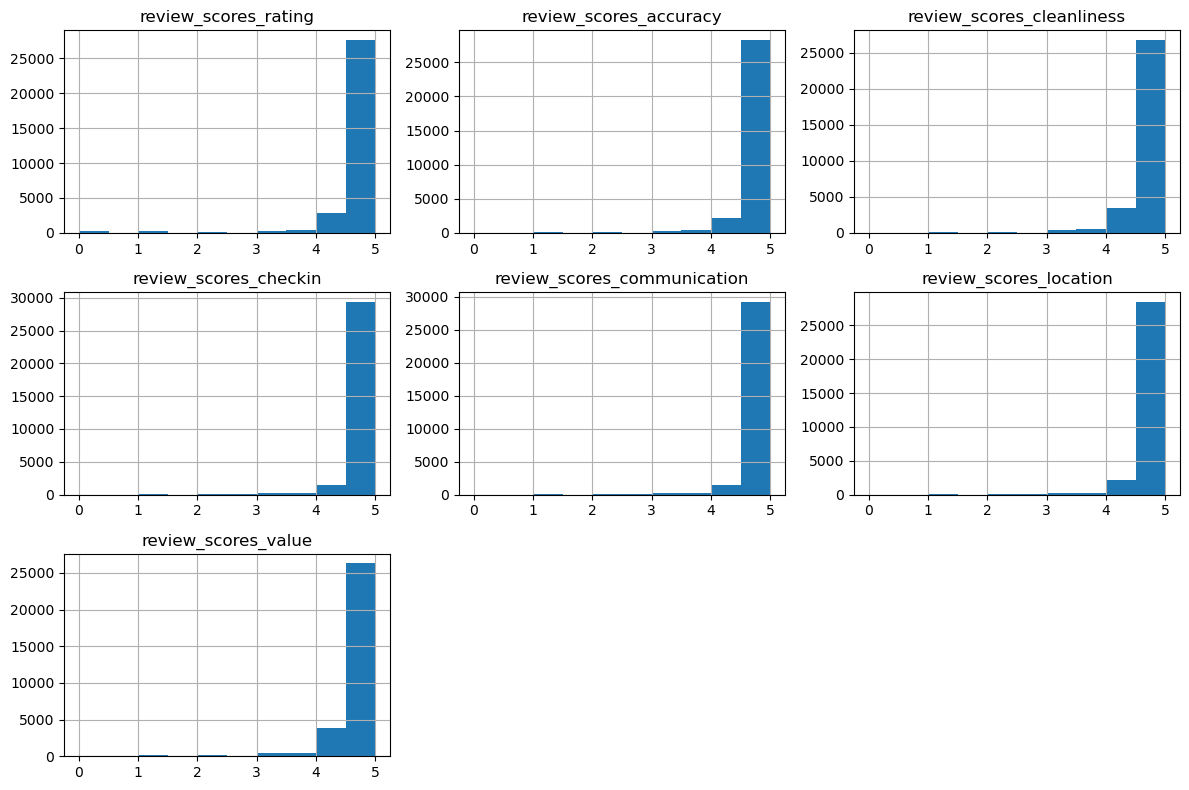

In [95]:
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [96]:
#dropping all but overall rating
df.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1, inplace=True)

In [97]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [98]:
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

In [99]:
df['instant_bookable'].isna().sum()

0

In [100]:
df['calculated_host_listings_count'].isna().sum()

0

In [101]:
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 100)
df.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,host_days_active,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,days_since_firstreview,days_since_lastreview
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,within an hour,100%,100%,0.0,1.0,1.0,Valley Glen,Private room in bed and breakfast,Private room,3,1,2.0,2.0,80.0,31,120,1,0,216,4.96,0,4,4328.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3807.0,858.0
40667,within a day,100%,0-49%,0.0,1.0,0.0,Mid-City,Private room in rental unit,Private room,2,1,2.0,2.0,59.0,30,180,1,90,12,4.30,0,1,4643.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4278.0,1686.0
109,within a few hours,100%,0-49%,0.0,1.0,1.0,Culver City,Entire condo,Entire home/apt,6,2,2.0,2.0,129.0,30,730,1,3,2,4.00,0,1,5396.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4252.0,2517.0


In [102]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
df = df[df.bedrooms > 0]
df = df[df.bathrooms_text > 0]
df = df[df.accommodates > 0]
df = df[df.price > 0]
df = df[df.beds > 0]
df = df[df.review_scores_rating > 0]


df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,host_days_active,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,days_since_firstreview,days_since_lastreview
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150097,within an hour,100%,100%,0.0,1.0,1.0,Valley Glen,Private room in bed and breakfast,Private room,3,1,2.0,2.0,80.0,31,120,1,0,216,4.96,0,4,4328.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3807.0,858.0
40667,within a day,100%,0-49%,0.0,1.0,0.0,Mid-City,Private room in rental unit,Private room,2,1,2.0,2.0,59.0,30,180,1,90,12,4.30,0,1,4643.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4278.0,1686.0
109,within a few hours,100%,0-49%,0.0,1.0,1.0,Culver City,Entire condo,Entire home/apt,6,2,2.0,2.0,129.0,30,730,1,3,2,4.00,0,1,5396.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4252.0,2517.0
152514,within an hour,100%,90-99%,1.0,1.0,1.0,Manhattan Beach,Entire guesthouse,Entire home/apt,2,1,1.0,1.0,132.0,60,365,1,34,1,5.00,0,2,4305.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3604.0,3604.0
43318,unknown,unknown,unknown,0.0,0.0,0.0,Downtown,Private room in hostel,Private room,1,11,1.0,1.0,47.0,2,28,1,84,111,4.37,0,14,1990.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4579.0,-42.0


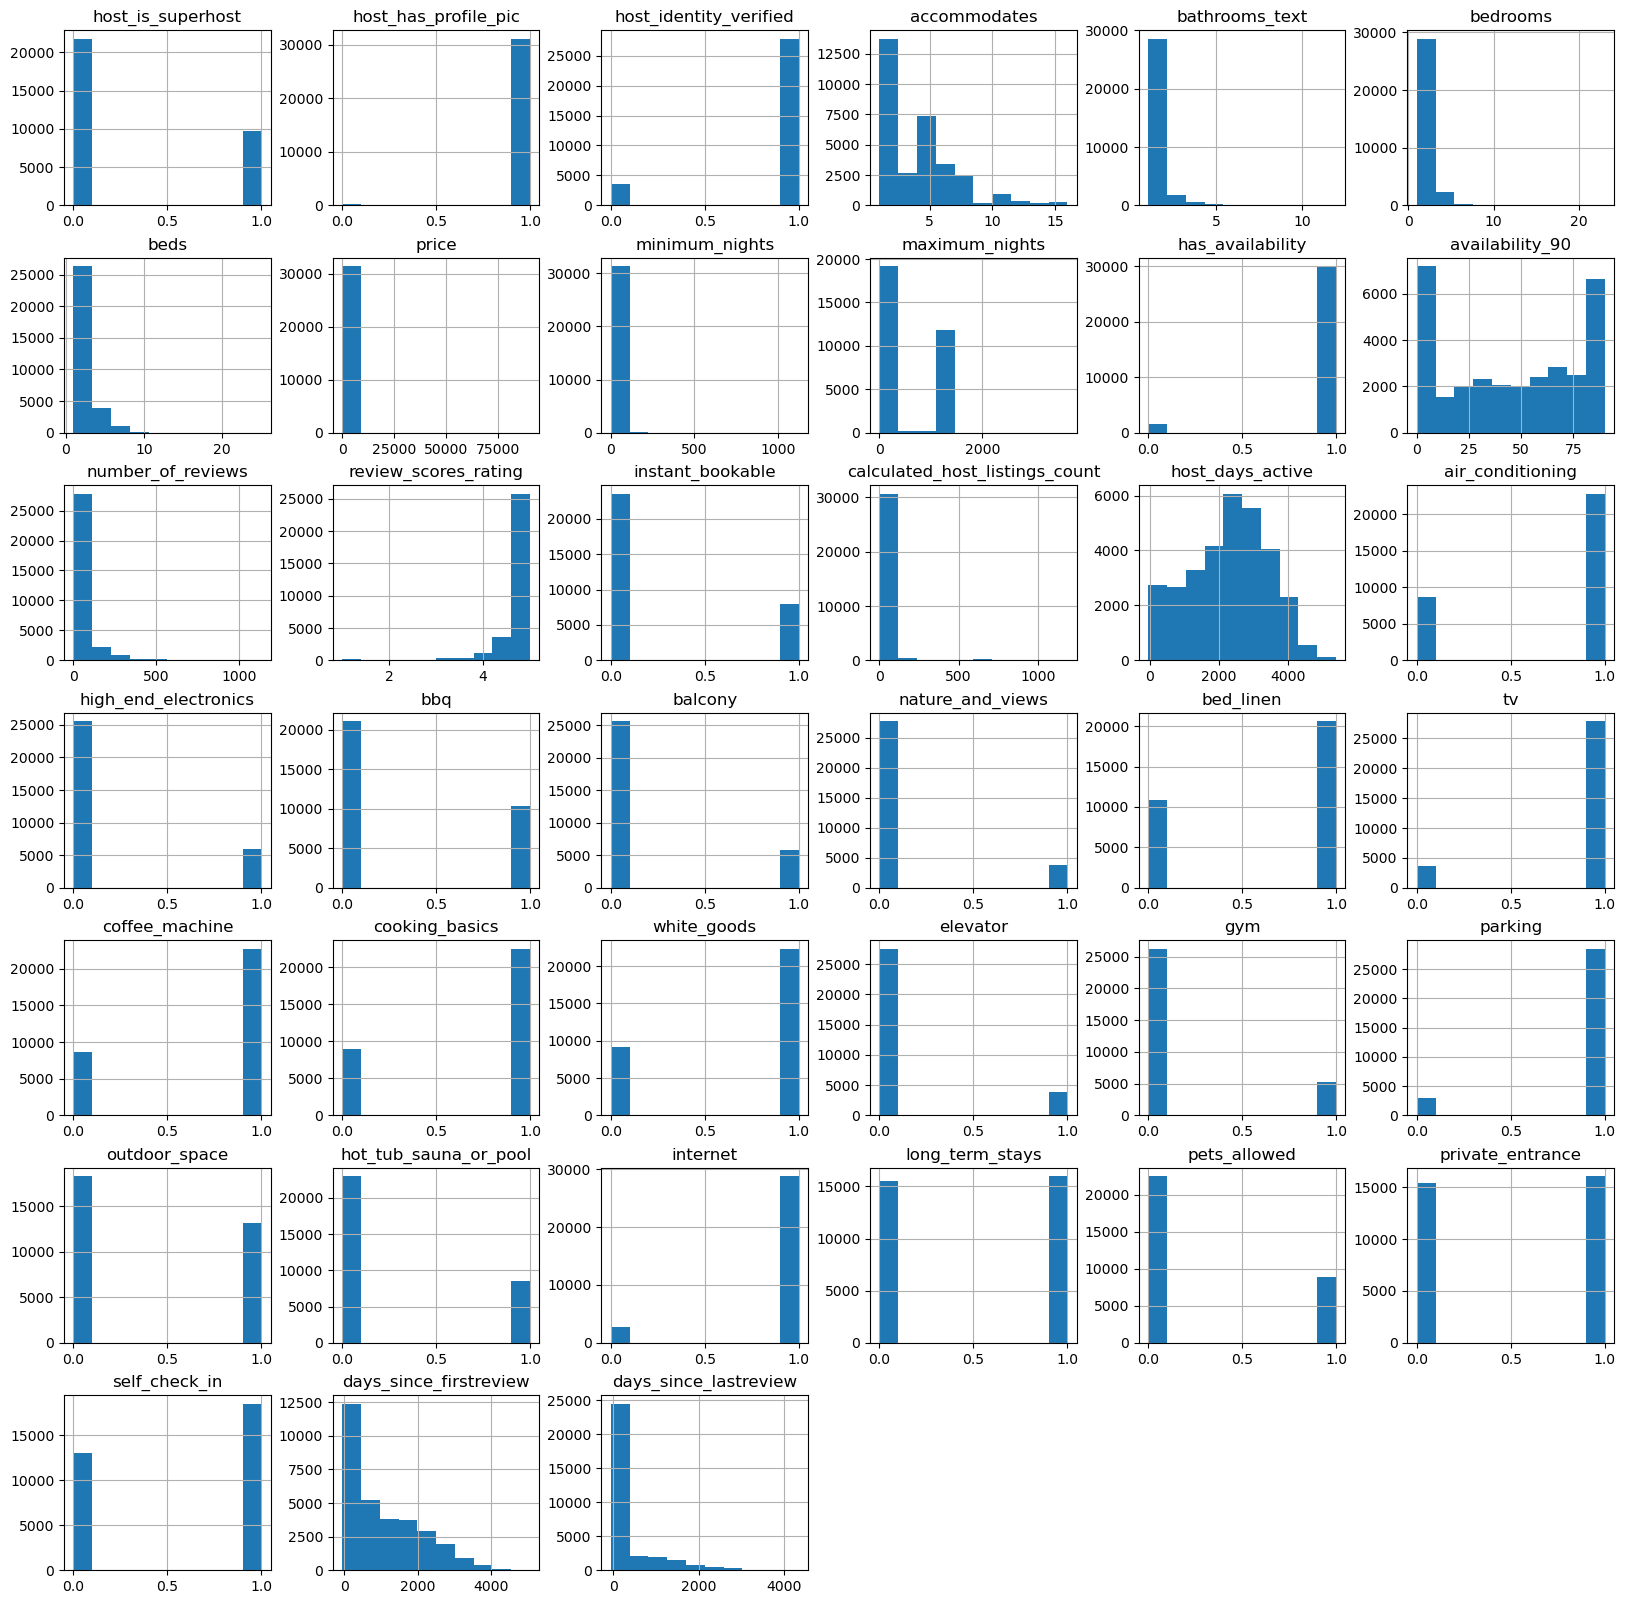

In [103]:
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [104]:
df['price'].describe()

count    31472.000000
mean       245.300998
std        844.794493
min         10.000000
25%         90.000000
50%        147.000000
75%        249.000000
max      90150.000000
Name: price, dtype: float64

In [105]:
df['price'].quantile(.95)

675.0

In [106]:
df = df[df['price'] <= 675]

In [107]:
df['price'].describe()

count    29908.000000
mean       175.293400
std        124.661845
min         10.000000
25%         88.000000
50%        140.000000
75%        225.000000
max        675.000000
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='price'>

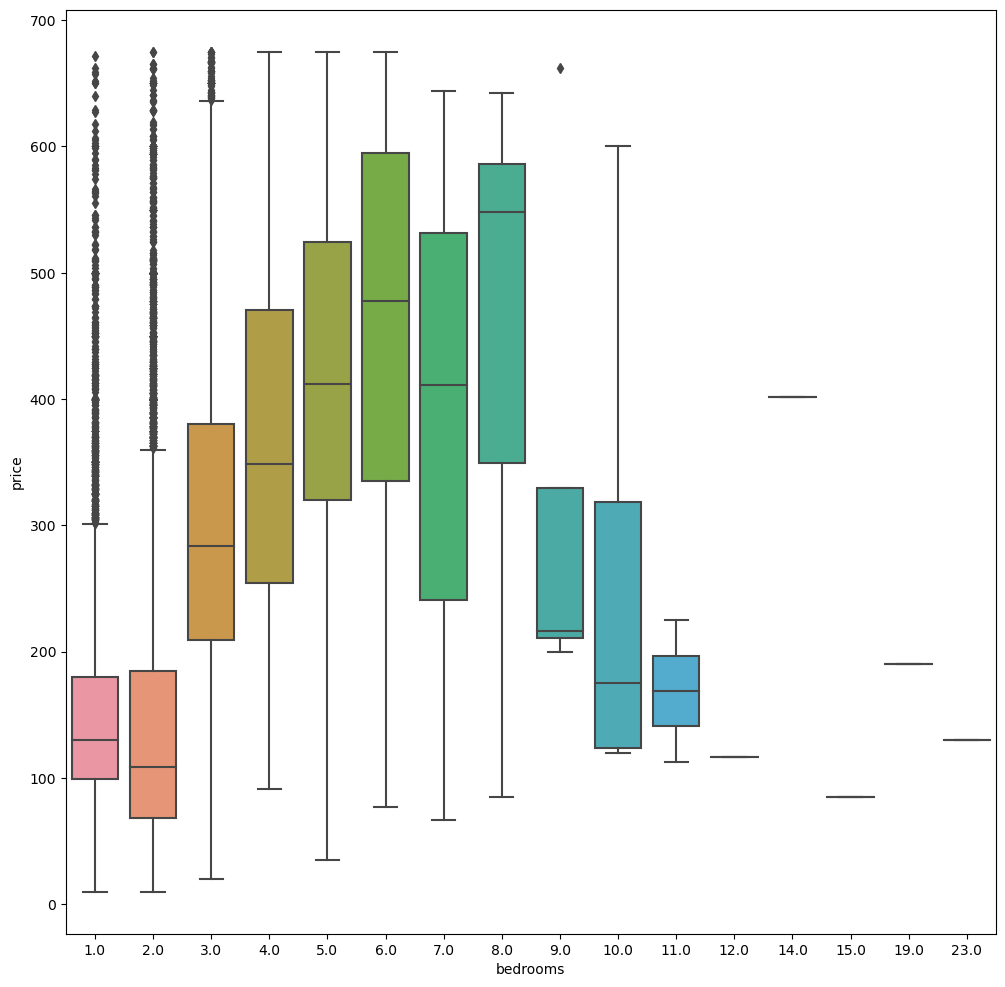

In [109]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=df[['bedrooms', 'price']])

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

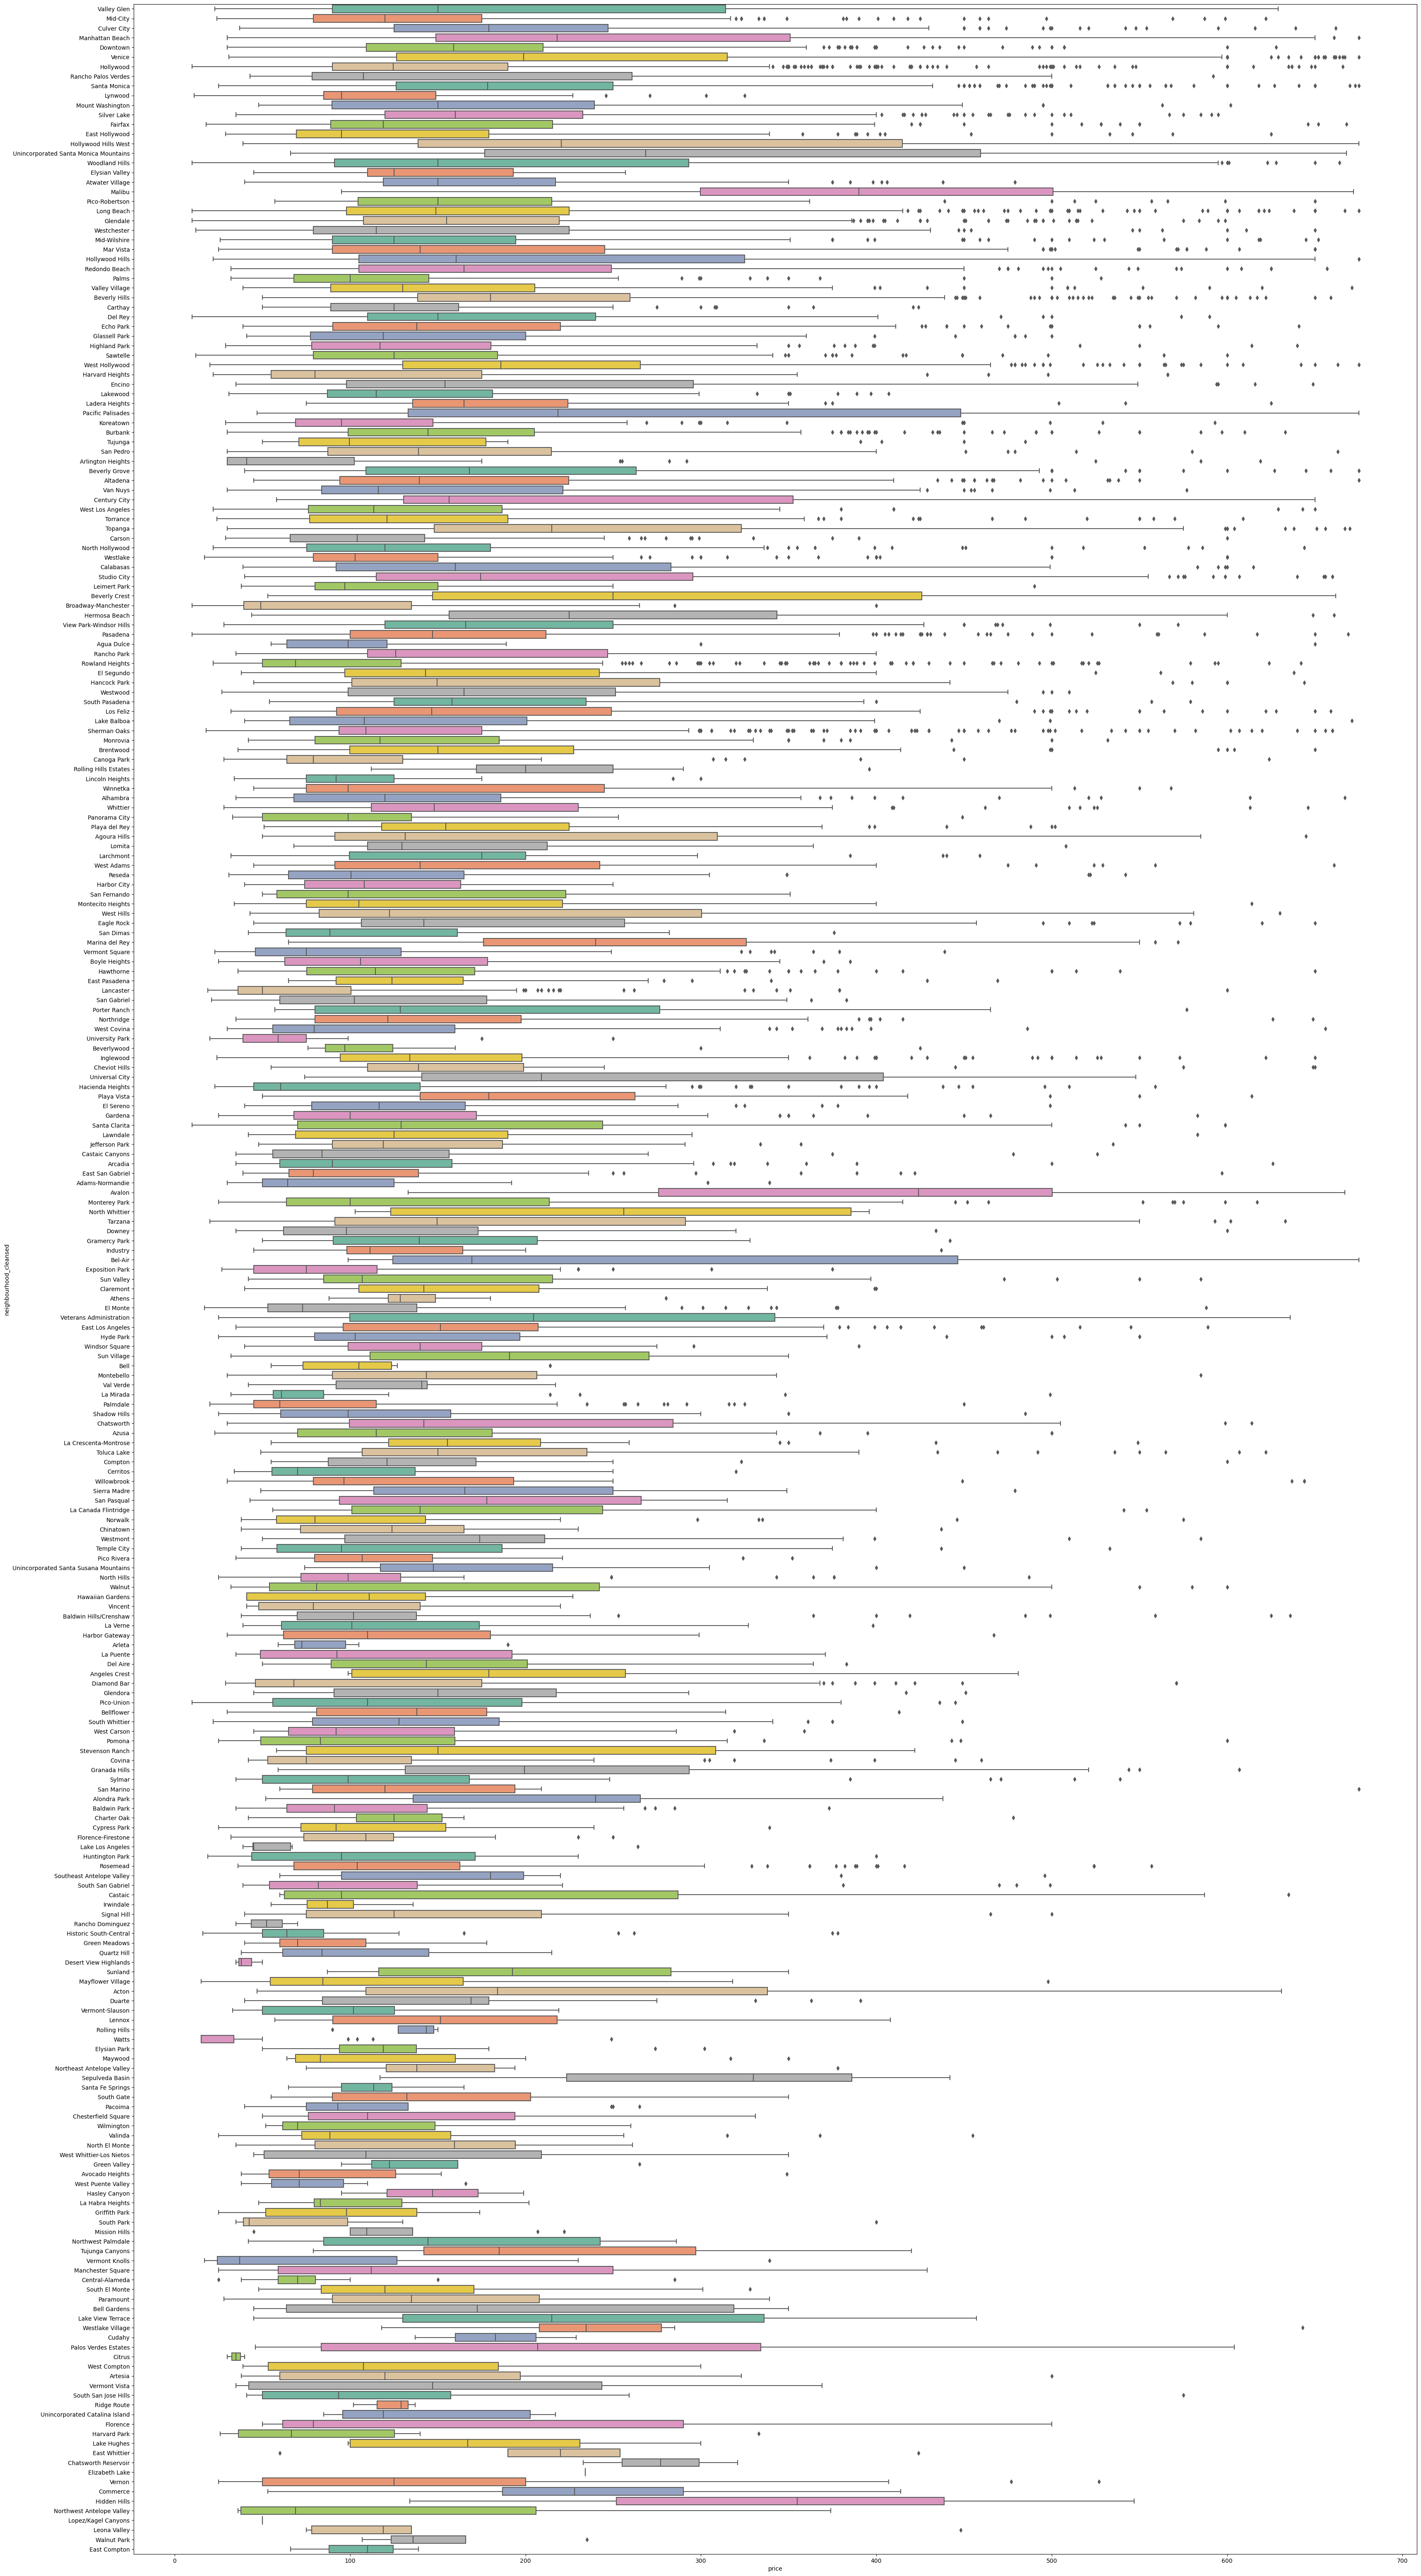

In [110]:
plt.figure(figsize = (40,80))
sns.boxplot(y = "neighbourhood_cleansed", x = "price", data = df, palette="Set2")

<Axes: xlabel='price', ylabel='Density'>

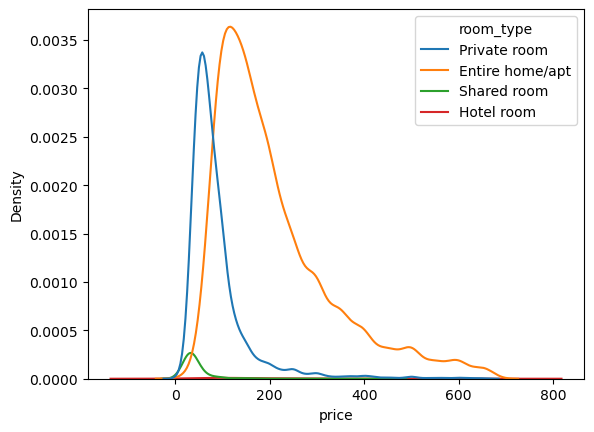

In [111]:
sns.kdeplot(data=df, x='price', hue='room_type', common_norm=True)

In [112]:
neighborhood_group = df.groupby('neighbourhood_cleansed', as_index=False).count()
neighborhood_group

,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,host_days_active,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,days_since_firstreview,days_since_lastreview
0,Acton,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,Adams-Normandie,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
2,Agoura Hills,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
3,Agua Dulce,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4,Alhambra,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Willowbrook,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
261,Wilmington,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
262,Windsor Square,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
263,Winnetka,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,29908.0,0.304868,0.460359,0.0,0.00,0.00,1.0,1.0
host_has_profile_pic,29908.0,0.990571,0.096645,0.0,1.00,1.00,1.0,1.0
host_identity_verified,29908.0,0.883576,0.320738,0.0,1.00,1.00,1.0,1.0
accommodates,29908.0,3.697673,2.460456,1.0,2.00,3.00,5.0,16.0
bathrooms_text,29908.0,1.369734,0.744334,1.0,1.00,1.00,2.0,11.0
bedrooms,29908.0,1.928548,0.889229,1.0,1.00,2.00,2.0,23.0
beds,29908.0,2.051190,1.439994,1.0,1.00,2.00,3.0,25.0
price,29908.0,175.293400,124.661845,10.0,88.00,140.00,225.0,675.0
minimum_nights,29908.0,15.950114,27.549869,1.0,2.00,4.00,30.0,1124.0
maximum_nights,29908.0,546.626220,471.029411,1.0,90.00,365.00,1125.0,3650.0


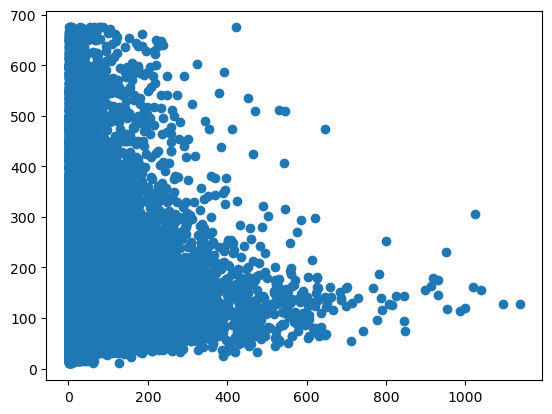

In [114]:
plt.scatter(df['number_of_reviews'], df['price'])